<a href="https://colab.research.google.com/github/sarenales/VSR-Retrieval/blob/main/Resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación 1**: ITM (Image Text Matching)

En esta primera fase de evaluación, nos enfocaremos únicamente en el resultado de la predicción y realizaremos un análisis de los resultados obtenidos.

## Criterio 1: Generating


In [ ]:
import json

with open("resultados_base_17.json", "r") as resultados_json:
    datos = json.load(resultados_json)

In [ ]:
def convert_response_to_label(response):
  palabras = response.split()
  if not palabras:
    return -1
  y = ["yes", "yes,","yes.","yes..",  "yes!","yes..."]
  n = [ "no","no,","no.", "no..", "no!", "no..."]
  if palabras[0].lower() in y :
      return 1
  elif palabras[0].lower() in n:
      return 0
  else:
      # print(palabras[0].lower())
      return -1

In [ ]:
y_pred = []
y_true = []

predicciones_correcta_bien = 0
predicciones_incorrectas_bien = 0

predicciones_correctas_mal = 0
predicciones_incorrectas_mal = 0

predicciones_correctas_incorrecta_bien = 0

predicciones_malas = 0

predicciones_random = 0

for indice, (clave,valor) in enumerate(datos.items()):
  acierto_correcta = convert_response_to_label(valor["response+"])
  y_pred.append(acierto_correcta)
  y_true.append(1)
  acierto_incorrecta = convert_response_to_label(valor["response-"])
  y_pred.append(acierto_incorrecta)
  y_true.append(0)

  if acierto_correcta == 1: # ACIERTA en correcta YES 1
    if acierto_incorrecta == 0:
      predicciones_correctas_incorrecta_bien += 1
    predicciones_correcta_bien += 1
  elif acierto_correcta == 0: # FALLA en correcta NO 0
    predicciones_malas += 1
    predicciones_correctas_mal +=1
  elif acierto_correcta == -1:  # totalmente ajeno a YES/NO
    predicciones_malas += 1
    predicciones_random +=1

  if acierto_incorrecta == 0: # ACIERTA en incorrecta  NO 0
    predicciones_incorrectas_bien += 1
  elif acierto_incorrecta == 1: # FALLA en incorrecta YES 1
    predicciones_malas += 1
    predicciones_incorrectas_mal +=1
  elif acierto_incorrecta == -1:
    predicciones_malas += 1
    predicciones_random +=1

total_predicciones = len(datos)
accuracy_cap_correcta = predicciones_correcta_bien / total_predicciones
accuracy_cap_incorrecta = predicciones_incorrectas_bien / total_predicciones
accuracy_cap_correcta_incorrecta = predicciones_correctas_incorrecta_bien / (total_predicciones*2)


print("ACIERTOS")
print("Número de predicciones ciertas en caption correcta (debe ser YES):                   ", predicciones_correcta_bien)
print("Número de predicciones ciertas en caption incorrecta (debe ser NO):                  ", predicciones_incorrectas_bien)
print("Número de predicciones ciertas tanto en caption correcta e incorrecta (YES -> NO):   ", predicciones_correctas_incorrecta_bien)
print("---------------------------------------------------------------------------------------------------------------------------")
print("FALLOS")
print("Número de predicciones falladas en caption correcta (debe ser NO) :                  ", predicciones_correctas_mal)
print("Número de predicciones falladas en caption incorrecta (debe ser YES):                ", predicciones_incorrectas_mal)
print("Número de predicciones random  (devuelve diferente a NO/YES):                        ", predicciones_random)
print("Número de predicciones falladas en total :                                           ", predicciones_malas)
print("Número de predicciones falladas en total :                                           ", predicciones_correctas_mal+predicciones_incorrectas_mal+predicciones_random)
print("---------------------------------------------------------------------------------------------------------------------------")
print("Número de predicciones total:                                                        ", total_predicciones)
print("Suma :                                                                               ", predicciones_correcta_bien+predicciones_incorrectas_bien+predicciones_correctas_incorrecta_bien+predicciones_malas)
print("===========================================================================================================================")
print("PRECISION")
print("Accuracy aciertos correcta:                                                           ", accuracy_cap_correcta)
print("Accuracy aciertos incorrecta:                                                         ", accuracy_cap_incorrecta)
print("Accuracy aciertos en correcta e incorrecta:                                           ", accuracy_cap_correcta_incorrecta)


ACIERTOS
Número de predicciones ciertas en caption correcta (debe ser YES):                    4828
Número de predicciones ciertas en caption incorrecta (debe ser NO):                   828
Número de predicciones ciertas tanto en caption correcta e incorrecta (YES -> NO):    180
---------------------------------------------------------------------------------------------------------------------------
FALLOS
Número de predicciones falladas en caption correcta (debe ser NO) :                   775
Número de predicciones falladas en caption incorrecta (debe ser YES):                 4776
Número de predicciones random  (devuelve diferente a NO/YES):                         35
Número de predicciones falladas en total :                                            5586
Número de predicciones falladas en total :                                            5586
---------------------------------------------------------------------------------------------------------------------------
Número de pre

## Matriz confusión

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


conf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 0, -1])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No', 'Others'], yticklabels=['Yes', 'No', 'Others'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Evaluación ITM')
plt.show()

## Criterio 2: Probabilidades

In [ ]:
def acierta_1(PYP,PNP,PYN,PNN):
  DP = PYP - PNP
  DN = PYN - PNN
  if DP > DN:
    return 1
  return 0

In [ ]:
datos_filtrados = []

for indice, (clave,valor) in enumerate(datos.items()):
  rel_esp = valor["relation+"]
  acierto = acierta_1(valor["PY+"],valor["PN+"],valor["PY-"],valor["PN-"])
  if acierto == 2:
    print(indice, clave, valor)
  split = valor["split"]
  datos_filtrados.append({"relacion_espacial": rel_esp, "acierto": acierto, "split":split})

In [ ]:
predicciones_correctas = sum(1 for instancia in datos_filtrados if instancia["acierto"] == 1)

total_predicciones = len(datos_filtrados)

accuracy = predicciones_correctas / total_predicciones

print("Número de predicciones correctas:  ", predicciones_correctas)
print("Total de predicciones:             ", total_predicciones)
print("------------------------------------------------------")
print("Accuracy Prob:                     ", accuracy)

Número de predicciones correctas:   2535
Total de predicciones:              5621
------------------------------------------------------
Accuracy Prob:                      0.450987368795588


## Graficas probabilidades

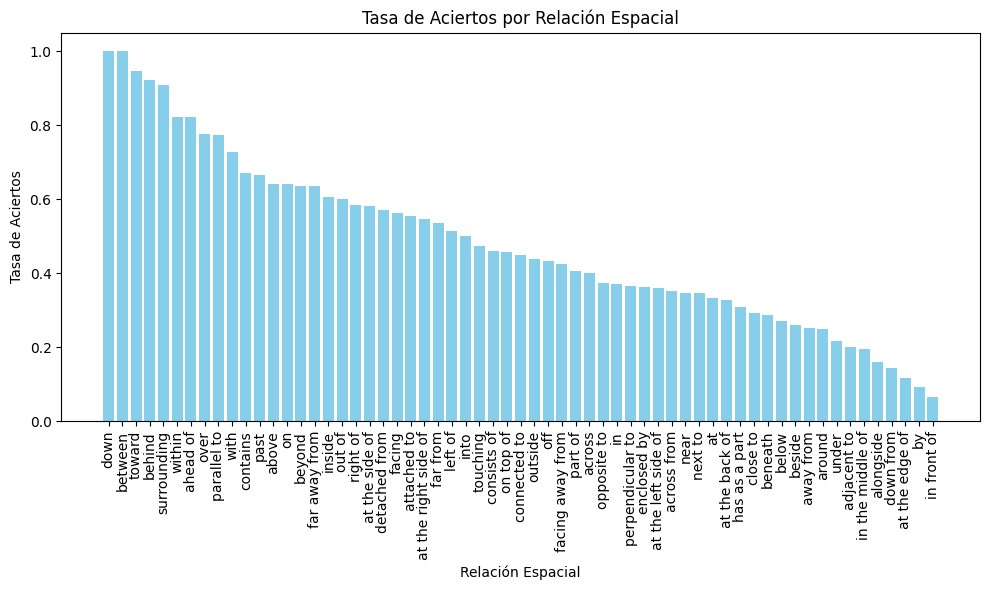

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(datos_filtrados)
total_por_relacion = df.groupby('relacion_espacial').size().reset_index(name='total')
aciertos_por_relacion = df[df['acierto'] == 1].groupby('relacion_espacial').size().reset_index(name='numero_aciertos')
resultados = pd.merge(aciertos_por_relacion, total_por_relacion, on='relacion_espacial')
resultados['tasa_aciertos'] = resultados['numero_aciertos'] / resultados['total']
resultados = resultados.sort_values(by='tasa_aciertos', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(resultados['relacion_espacial'], resultados['tasa_aciertos'], color='skyblue')
plt.xlabel('Relación Espacial')
plt.ylabel('Tasa de Aciertos')
plt.title('Tasa de Aciertos por Relación Espacial')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
categories = {
    "Adjacency": [
        "adjacent to", "alongside", "at the side of", "at the right side of",
        "at the left side of", "attached to", "at the back of", "ahead of",
        "against", "at the edge of"
    ],
    "Directional": [
        "off", "past", "toward", "down", "deep down", "up", "away from",
        "along", "around", "from", "into", "to", "across", "across from",
        "through", "down from"
    ],
    "Orientation": [
        "facing", "facing away from", "parallel to", "perpendicular to"
    ],
    "Projective": [
        "on top of", "beneath", "beside", "behind", "left of", "right of",
        "under", "in front of", "below", "above", "over", "in the middle of"
    ],
    "Proximity": [
        "by", "close to", "near", "far from", "far away from"
    ],
    "Topological": [
        "connected to", "detached from", "has as a part", "part of", "contains",
        "within", "at", "on", "in", "with", "surrounding", "among",
        "consists of", "out of", "between", "inside", "outside", "touching"
    ],
    "Unallocated": [
        "beyond", "next to", "opposite to", "after", "among", "enclosed by"
    ]
}

In [ ]:
def categorize_relation(relation):
    for category, relations in categories.items():
        if relation in relations:
            return category
    return "Unknown"

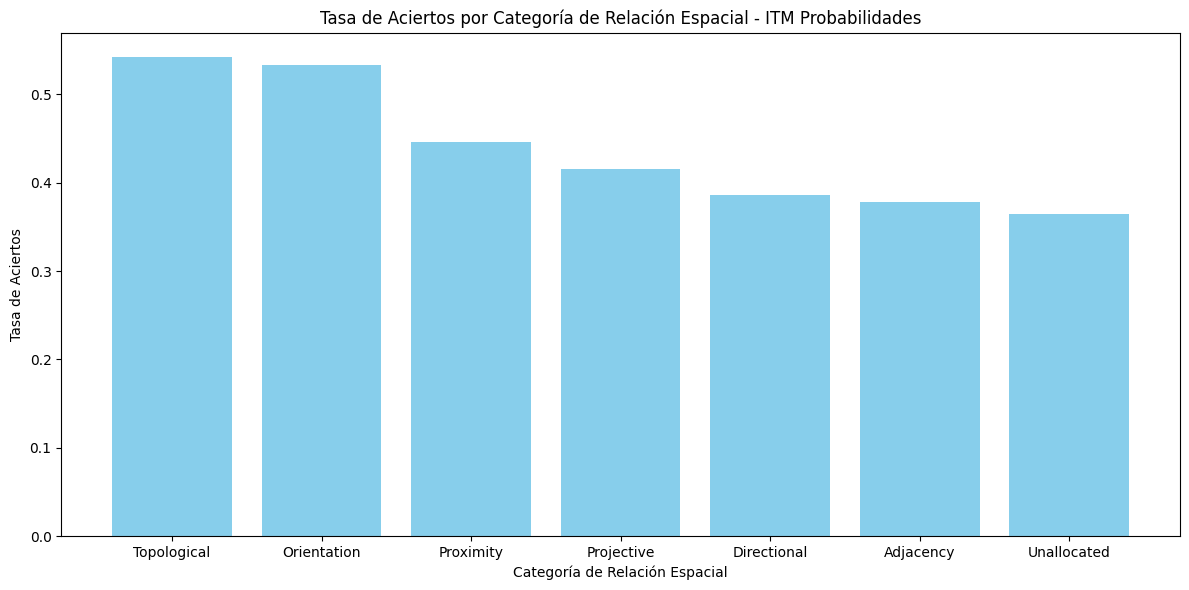

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(datos_filtrados)
df['categoria'] = df['relacion_espacial'].apply(categorize_relation)
total_por_categoria = df.groupby('categoria').size().reset_index(name='total')
aciertos_por_categoria = df[df['acierto'] == 1].groupby('categoria').size().reset_index(name='numero_aciertos')
resultados = pd.merge(aciertos_por_categoria, total_por_categoria, on='categoria')
resultados['tasa_aciertos'] = resultados['numero_aciertos'] / resultados['total']
resultados = resultados.sort_values(by='tasa_aciertos', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(resultados['categoria'], resultados['tasa_aciertos'], color='skyblue')
plt.xlabel('Categoría de Relación Espacial')
plt.ylabel('Tasa de Aciertos')
plt.title('Tasa de Aciertos por Categoría de Relación Espacial - ITM Probabilidades')
plt.tight_layout()
plt.show()

## Criterio 3: Probabilidades normalizadas

In [ ]:
def acierta_2(PYP,PNP,PYN,PNN):

  total_prob_p = PYP + PNP
  if total_prob_p == 0.0:
    return 0
  normalized_prob_yes_p = PYP / total_prob_p
  normalized_prob_no_p = PNP / total_prob_p

  total_prob_n = PYN + PNN
  if total_prob_n == 0.0:
    return 0
  normalized_prob_yes_n = PYN / total_prob_n
  normalized_prob_no_n = PNN / total_prob_n

  DP = normalized_prob_yes_p - normalized_prob_no_p
  DN = normalized_prob_yes_n - normalized_prob_no_n

  if DP > DN:
    return 1
  return 0

In [ ]:
datos_filtrados_norm = []

for indice, (clave,valor) in enumerate(datos.items()):
  rel_esp = valor["relation+"]
  acierto = acierta_2(valor["PY+"],valor["PN+"],valor["PY-"],valor["PN-"])
  datos_filtrados_norm.append({"relacion_espacial": rel_esp, "acierto": acierto})

In [ ]:
predicciones_correctas = sum(1 for instancia in datos_filtrados_norm if instancia["acierto"] == 1)

total_predicciones = len(datos_filtrados_norm)

accuracy = predicciones_correctas / total_predicciones

print("Número de predicciones correctas:  ", predicciones_correctas)
print("Total de predicciones:             ", total_predicciones)
print("------------------------------------------------------")
print("Accuracy prob norm:                ", accuracy)

Número de predicciones correctas:   3244
Total de predicciones:              5621
------------------------------------------------------
Accuracy prob norm:                 0.577121508628358


## Graficas probabilidades normalizadas

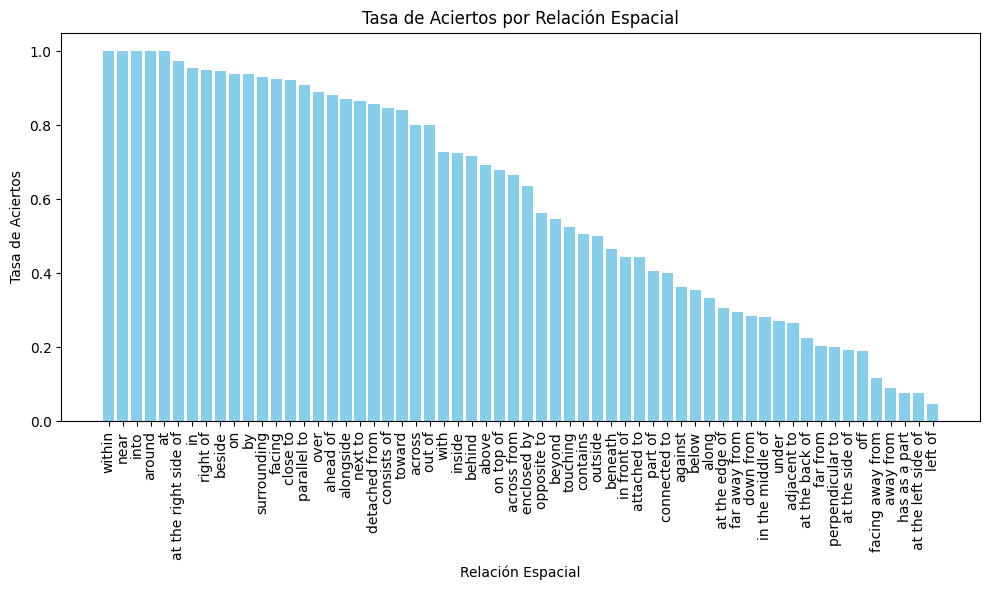

In [ ]:
df = pd.DataFrame(datos_filtrados)
total_por_relacion = df.groupby('relacion_espacial').size().reset_index(name='total')
aciertos_por_relacion = df[df['acierto'] == 1].groupby('relacion_espacial').size().reset_index(name='numero_aciertos')
resultados = pd.merge(aciertos_por_relacion, total_por_relacion, on='relacion_espacial')
resultados['tasa_aciertos'] = resultados['numero_aciertos'] / resultados['total']
resultados = resultados.sort_values(by='tasa_aciertos', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(resultados['relacion_espacial'], resultados['tasa_aciertos'], color='skyblue')
plt.xlabel('Relación Espacial')
plt.ylabel('Tasa de Aciertos')
plt.title('Tasa de Aciertos por Relación Espacial')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

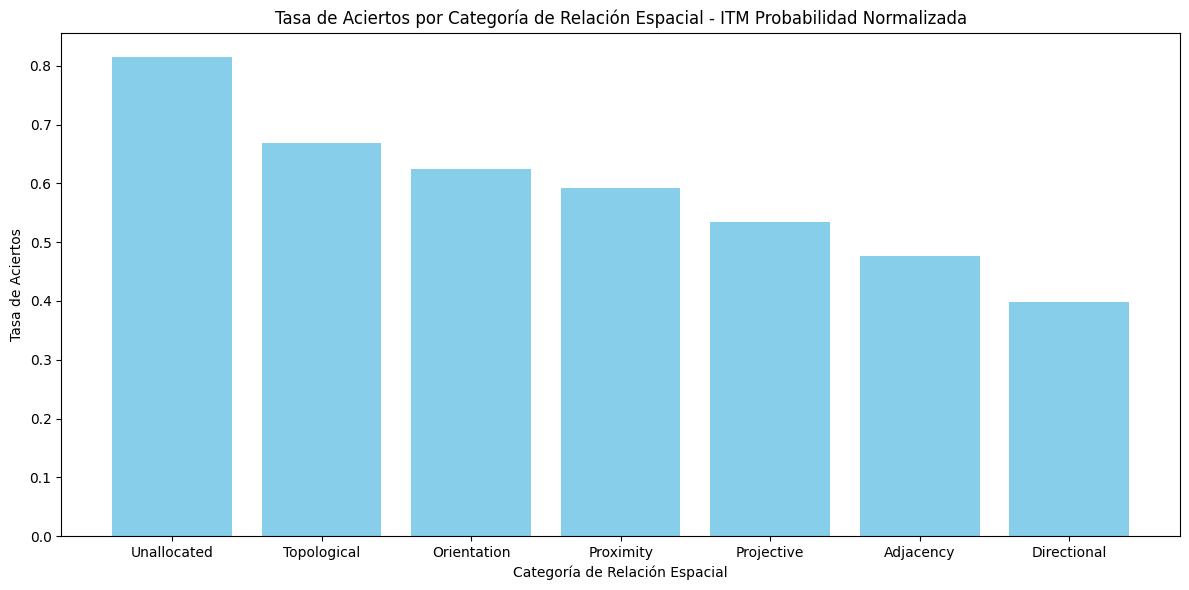

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(datos_filtrados)
df['categoria'] = df['relacion_espacial'].apply(categorize_relation)
total_por_categoria = df.groupby('categoria').size().reset_index(name='total')
aciertos_por_categoria = df[df['acierto'] == 1].groupby('categoria').size().reset_index(name='numero_aciertos')
resultados = pd.merge(aciertos_por_categoria, total_por_categoria, on='categoria')
resultados['tasa_aciertos'] = resultados['numero_aciertos'] / resultados['total']
resultados = resultados.sort_values(by='tasa_aciertos', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(resultados['categoria'], resultados['tasa_aciertos'], color='skyblue')
plt.xlabel('Categoría de Relación Espacial')
plt.ylabel('Tasa de Aciertos')
plt.title('Tasa de Aciertos por Categoría de Relación Espacial - ITM Probabilidad Normalizada')
plt.tight_layout()
plt.show()

## Más análisis de los datos extraídos de las probabilidades - Matriz confusión

In [ ]:
TP = 0
FN = 0
TN = 0
FP = 0
R = 0

In [ ]:
def analisis_TP_FN(probYES, probNO):
  global TP
  global FN
  global R
  if probYES > probNO:
    TP += 1
  elif probYES < probNO:
    FN += 1
  else:
    R += 1

def analisis_TN_FP(probYES, probNO):
  global FP
  global TN
  global R
  if probNO > probYES:
    TN += 1
  elif probNO < probYES:
    FP += 1
  else:
    R += 1

In [ ]:
for indice, (clave,valor) in enumerate(datos.items()):
  analisis_TP_FN(valor["PY+"], valor["PN+"])

  analisis_TN_FP(valor["PY-"], valor["PN-"])

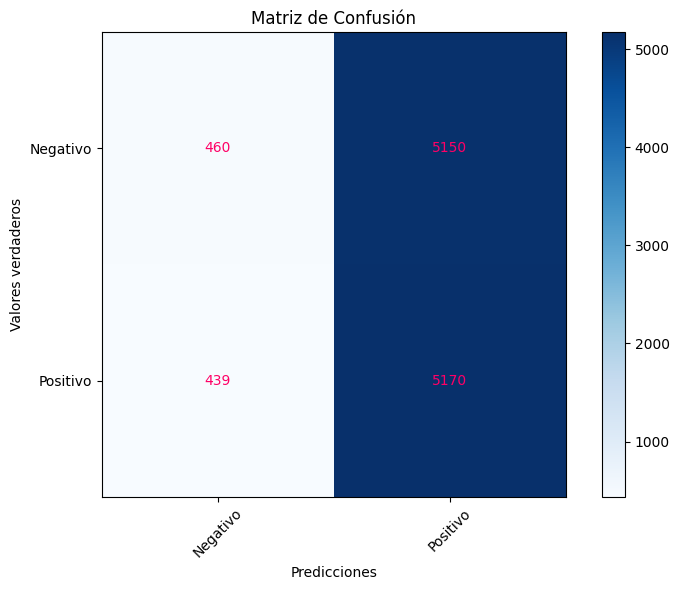

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

matriz_confusion = np.array([[TN, FP], [FN, TP]])
etiquetas = ['Negativo', 'Positivo']


plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()


ticks = np.arange(len(etiquetas))
plt.xticks(ticks, etiquetas, rotation=45)
plt.yticks(ticks, etiquetas)


for i in range(len(etiquetas)):
    for j in range(len(etiquetas)):
        plt.text(j, i, matriz_confusion[i, j], ha='center', va='center', color='#ff0066')

plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.tight_layout()
plt.show()

# **Evaluación** 2: Captioner

## Accuracies: prob medias, logit1, logit2

In [ ]:
import json

with open("resultados_captioner_Base_17.json", "r") as resultados_json:
    datos = json.load(resultados_json)

In [ ]:
def diferencia_PN(p,n):
  return abs(p-n)

In [ ]:
def acierta(positivo, negativo):
  if positivo > negativo:
    return 1
  return 0

In [ ]:
datos_filtrados_log1 = []
datos_filtrados_log2 = []
datos_filtrados_prob = []
datos_filtrados_prob_D = []

for indice, (clave,valor) in enumerate(datos.items()):
  rel_esp = valor["relation+"]
  sum_log1P = valor["suma_log1+"]
  sum_log1N = valor["suma_log1-"]

  prob_mediaP = valor["prob_media+"]
  prob_mediaN = valor["prob_media-"]

  sum_log2P = valor["suma_log2+"]
  sum_log2N = valor["suma_log2-"]

  acierto_log1 = acierta(sum_log1P,sum_log1N)
  acierto_log2 = acierta(sum_log2P,sum_log2N)
  acierto_prob = acierta(prob_mediaP,prob_mediaN)

  datos_filtrados_log1.append({"relacionE": rel_esp, "acierto_log": acierto_log1,"sum_logP":sum_log1P, "sum_logN":sum_log1N  })
  datos_filtrados_log2.append({"relacionE": rel_esp, "acierto_log": acierto_log2,"sum_logP":sum_log2P, "sum_logN":sum_log2N  })
  datos_filtrados_prob.append({"relacionE": rel_esp, "acierto_prob": acierto_prob, "mean_probP":prob_mediaP, "mean_probN":prob_mediaN })
  datos_filtrados_prob_D.append({"relacionE": rel_esp, "acierto_prob": acierto_prob, "dif_prob":diferencia_PN(prob_mediaP,prob_mediaN)})

In [ ]:
predicciones_correctas = sum(1 for instancia in datos_filtrados_prob if instancia["acierto_prob"] == 1)

total_predicciones = len(datos_filtrados_prob)

accuracy = predicciones_correctas / total_predicciones

print("Número de predicciones correctas:  ", predicciones_correctas)
print("Total de predicciones:             ", total_predicciones)
print("------------------------------------------------------")
print("Accuracy PROB. MEDIA:              ", accuracy)

Número de predicciones correctas:   2929
Total de predicciones:              5621
------------------------------------------------------
Accuracy PROB. MEDIA:               0.5210816580679595


In [ ]:
predicciones_correctas = sum(1 for instancia in datos_filtrados_log1 if instancia["acierto_log"] == 1)

total_predicciones = len(datos_filtrados_log1)

accuracy = predicciones_correctas / total_predicciones

print("Número de predicciones correctas:  ", predicciones_correctas)
print("Total de predicciones:             ", total_predicciones)
print("------------------------------------------------------")
print("Accuracy LOGITS 1:                 ", accuracy)

Número de predicciones correctas:   2470
Total de predicciones:              5621
------------------------------------------------------
Accuracy LOGITS 1:                  0.4394235901085216


In [ ]:
predicciones_correctas = sum(1 for instancia in datos_filtrados_log2 if instancia["acierto_log"] == 1)

total_predicciones = len(datos_filtrados_log2)

accuracy = predicciones_correctas / total_predicciones

print("Número de predicciones correctas:  ", predicciones_correctas)
print("Total de predicciones:             ", total_predicciones)
print("------------------------------------------------------")
print("Accuracy LOGITS 2:                 ", accuracy)

Número de predicciones correctas:   3906
Total de predicciones:              5621
------------------------------------------------------
Accuracy LOGITS 2:                  0.6948941469489415


## Graficas tasa todas evaluaciones

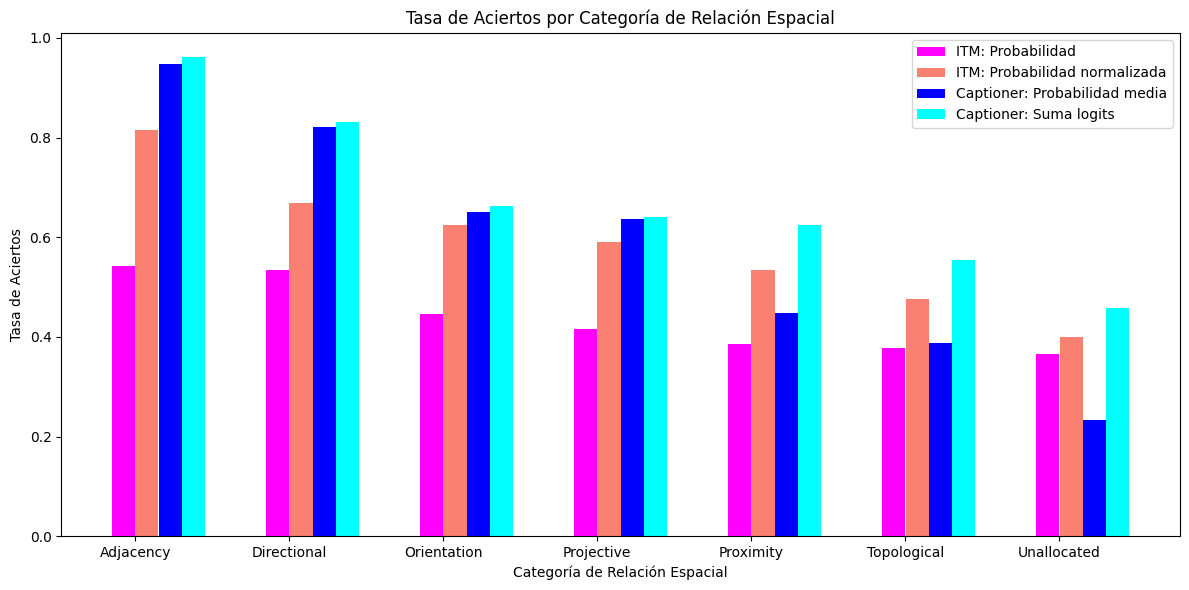

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_pro = pd.DataFrame(datos_filtrados)
df_pro['categoria'] = df_pro['relacion_espacial'].apply(categorize_relation)
total_intentos_por_categoria1 = df_pro.groupby('categoria').size().reset_index(name='total_intentos')
aciertos_por_categoria1 = df_pro[df_pro['acierto'] == 1].groupby('categoria').size().reset_index(name='numero_aciertos')
tasa_aciertos_por_categoria1 = pd.merge(aciertos_por_categoria1, total_intentos_por_categoria1, on='categoria')
tasa_aciertos_por_categoria1['tasa_aciertos'] = tasa_aciertos_por_categoria1['numero_aciertos'] / tasa_aciertos_por_categoria1['total_intentos']
tasa_aciertos_por_categoria1 = tasa_aciertos_por_categoria1.sort_values(by='tasa_aciertos', ascending=False)



df_prob_norm = pd.DataFrame(datos_filtrados_norm)
df_prob_norm['categoria'] = df_prob_norm['relacion_espacial'].apply(categorize_relation)
total_intentos_por_categoria2 = df_prob_norm.groupby('categoria').size().reset_index(name='total_intentos')
aciertos_por_categoria2 = df_prob_norm[df_prob_norm['acierto'] == 1].groupby('categoria').size().reset_index(name='numero_aciertos')
tasa_aciertos_por_categoria2 = pd.merge(aciertos_por_categoria2, total_intentos_por_categoria2, on='categoria')
tasa_aciertos_por_categoria2['tasa_aciertos'] = tasa_aciertos_por_categoria2['numero_aciertos'] / tasa_aciertos_por_categoria2['total_intentos']
tasa_aciertos_por_categoria2 = tasa_aciertos_por_categoria2.sort_values(by='tasa_aciertos', ascending=False)


df_cap_pro_med = pd.DataFrame(datos_filtrados_prob)
df_cap_pro_med['categoria'] = df_cap_pro_med['relacionE'].apply(categorize_relation)
total_intentos_por_categoria3 = df_cap_pro_med.groupby('categoria').size().reset_index(name='total_intentos')
aciertos_por_categoria3 = df_cap_pro_med[df_cap_pro_med['acierto_prob'] == 1].groupby('categoria').size().reset_index(name='numero_aciertos')
tasa_aciertos_por_categoria3 = pd.merge(aciertos_por_categoria3, total_intentos_por_categoria3, on='categoria')
tasa_aciertos_por_categoria3['tasa_aciertos'] = tasa_aciertos_por_categoria3['numero_aciertos'] / tasa_aciertos_por_categoria3['total_intentos']
tasa_aciertos_por_categoria3 = tasa_aciertos_por_categoria3.sort_values(by='tasa_aciertos', ascending=False)



df_log2 = pd.DataFrame(datos_filtrados_log2)
df_log2['categoria'] = df_log2['relacionE'].apply(categorize_relation)
total_intentos_por_categoria4 = df_log2.groupby('categoria').size().reset_index(name='total_intentos')
aciertos_por_categoria4 = df_log2[df_log2['acierto_log'] == 1].groupby('categoria').size().reset_index(name='numero_aciertos')
tasa_aciertos_por_categoria4 = pd.merge(aciertos_por_categoria4, total_intentos_por_categoria4, on='categoria')
tasa_aciertos_por_categoria4['tasa_aciertos'] = tasa_aciertos_por_categoria4['numero_aciertos'] / tasa_aciertos_por_categoria4['total_intentos']
tasa_aciertos_por_categoria4 = tasa_aciertos_por_categoria4.sort_values(by='tasa_aciertos', ascending=False)



bar_width = 0.15
separation = 0.001
r1 = range(len(aciertos_por_categoria1))
r2 = [x + bar_width + separation for x in r1]
r3 = [x + (bar_width + separation) * 2  for x in r1]
r4 = [x + (bar_width + separation) * 3  for x in r1]


plt.figure(figsize=(12, 6))
plt.bar(r1, tasa_aciertos_por_categoria1['tasa_aciertos'], color='magenta', width=bar_width, label='ITM: Probabilidad')
plt.bar(r2, tasa_aciertos_por_categoria2['tasa_aciertos'], color='salmon', width=bar_width, label='ITM: Probabilidad normalizada')
plt.bar(r3, tasa_aciertos_por_categoria3['tasa_aciertos'], color='blue', width=bar_width, label='Captioner: Probabilidad media')
plt.bar(r4, tasa_aciertos_por_categoria4['tasa_aciertos'], color='cyan', width=bar_width, label='Captioner: Suma logits')

plt.xlabel('Categoría de Relación Espacial')
plt.ylabel('Tasa de Aciertos')
plt.title('Tasa de Aciertos por Categoría de Relación Espacial')


plt.xticks([r + bar_width / 2 for r in range(len(aciertos_por_categoria1))], aciertos_por_categoria1['categoria'])
plt.legend()
plt.tight_layout()
plt.show()


# Graficas con otras escalas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

descriptions = [
    "1.1 Caption generado", "1.2 Prob.", "1.3 Prob. normalizadas:",
    "2.1 Prob. media", "2.2 Suma de Logits"
]
precision_ofa_base = [1.60, 45.10, 57.71, 52.11, 69.49]
precision_ofa_large = [0.41, 54.24, 60.08, 48.23, 76.27]
precision_ofa_huge = [1.35, 52.59, 66.16, 52.36, 71.96]
bar_width = 0.2
index = np.arange(len(descriptions))
separation = 0.1
plt.figure(figsize=(14, 8))
plt.bar(index - bar_width, precision_ofa_base, bar_width, color='navy', label='OFA - base')
plt.bar(index, precision_ofa_large, bar_width, color='salmon', label='OFA - large')
plt.bar(index + bar_width, precision_ofa_huge, bar_width, color='orange', label='OFA - huge')
plt.xlabel('Método')
plt.ylabel('Precisión (%)')
plt.title('Precisión de diferentes escalas de OFA por tipo de método usado')
plt.xticks(index, descriptions, rotation=30, ha="right")
plt.legend()
plt.tight_layout()
plt.show()